In [11]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

from matplotlib.colors import ListedColormap
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

Load the Iris data to use for experiments. The data include 50 observations of each of 3 types of irises (150 total). Each observation includes 4 measurements: sepal and petal width and height. The goal is to predict the iris type from these measurements.

<http://en.wikipedia.org/wiki/Iris_flower_data_set>

In [4]:
# Load the data, which is included in sklearn.
iris = load_iris()
print('Iris target names:', iris.target_names)
print('Iris feature names:', iris.feature_names)
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

print(X.shape)

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [5]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

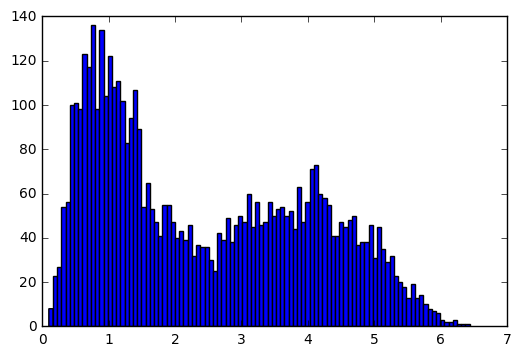

In [6]:
dists = []
for i in range(len(train_data) - 1):
    for j in range(i + 1, len(train_data)):
        dist = EuclideanDistance(train_data[i], train_data[j])
        dists.append(dist)
        
fig = plt.hist(dists, 100)

Ok now let's create a class that implements a Nearest Neighbors classifier. We'll model it after the sklearn classifier implementations, with fit() and predict() methods.

<http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier>

In [7]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

Run an experiment with the classifier.

In [9]:
clf = NearestNeighbors()
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)

correct, total = 0, 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1
    total += 1
print('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total:  50  correct:  48  accuracy: 0.96


### k nearest neighbors

The implementation above only allows for a single nearest neighbor; that is, the classifier predicts the label of the closest available point. What about using more than one nearest neighbor. Typically, this means to make a prediciton we:

1. Find the k closest points (according to our distance metric) to the query point.
2. Find the majority label of those k points found in (1)
3. Return the label in (2) as the prediction

In [64]:
class OurKNearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance, k=1):
        self.metric = metric
        self.k = k 
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = list(map(self._predict_item,test_data))
        return results
    
        
    # Private function for making a single prediction using KNN.
    def _predict_item(self,item):
        neighbors = []
        for i in range(len(self.train_data)):
            neighbors += [(self.metric(self.train_data[i], item),self.train_labels[i])]
        neighbors.sort(key = lambda x: x[0])
        kNN = neighbors[0:self.k]
        labels = Counter(label[1] for label in kNN)
        best_label = labels.most_common(1)[0][0]
        return best_label
        

### Picking k: the number of neighbors to use in classification

If you did not do the above, you can use sklearn's nearest neighbors classifier for an implementation with multiple k

Implement a way to pick the number of neighbors to use in the classifier. We already have a test set, so simply extend the procedure in the previous code cell to run over different numbers of neighbors. Plot the test set performance versus the number of neighbors.

(note: you can use sklearn's implementation here; for a challenge, implement knn above [only 1-nn is implemented right now!])

In [65]:
## code goes here!
for k in range(1, 10):
    clfk = OurKNearestNeighbors(k=k)
    clfk.fit(train_data, train_labels)
    preds = clfk.predict(test_data)
    
    print("k=", k, "; accuracy:", np.mean(preds == test_labels))

k= 1 ; accuracy: 0.96
k= 2 ; accuracy: 0.96
k= 3 ; accuracy: 0.96
k= 4 ; accuracy: 0.98
k= 5 ; accuracy: 0.96
k= 6 ; accuracy: 0.98
k= 7 ; accuracy: 0.96
k= 8 ; accuracy: 0.96
k= 9 ; accuracy: 0.94
